In [1]:
from kitaev import *
from tqdm import tqdm

#t=1
N_global = 100
d_global = 2
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=0 * t), v=offsite(_delta=1 * t, _t=t))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=1 * t), v=offsite(_delta=1 * t, _t=t))
# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?
var_T = np.arange(0.01*np.pi, np.pi/2, 0.005*np.pi)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

delta_amount =  0.000001
delta_positive_0 = (delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_0 = (-delta_amount * 1j) * np.eye(N_global * d_global)
delta_positive_pi = (1 - delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_pi = (1 + delta_amount * 1j) * np.eye(N_global * d_global)

delta_positive_pi_2 = (-1 - delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_pi_2 = (-1 + delta_amount * 1j) * np.eye(N_global * d_global)

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])
    h_f = (h_f + np.conj(h_f.T))/2 
    G_0_pos = np.array(la.inv(delta_positive_0 - h_f))
    G_0_neg = np.array(la.inv(delta_negative_0 - h_f))

    G_0_odd.append((G_0_pos - G_0_neg) / 2)
    G_0_even.append((G_0_pos + G_0_neg) / 2)

    G_pi_pos = np.array(la.inv(delta_positive_pi - h_f) + la.inv(delta_positive_pi_2 - h_f))
    G_pi_neg = np.array(la.inv(delta_negative_pi - h_f) + la.inv(delta_negative_pi_2 - h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg) / 4)
    G_pi_even.append((G_pi_pos + G_pi_neg) / 4)
    pass



hi


100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


98


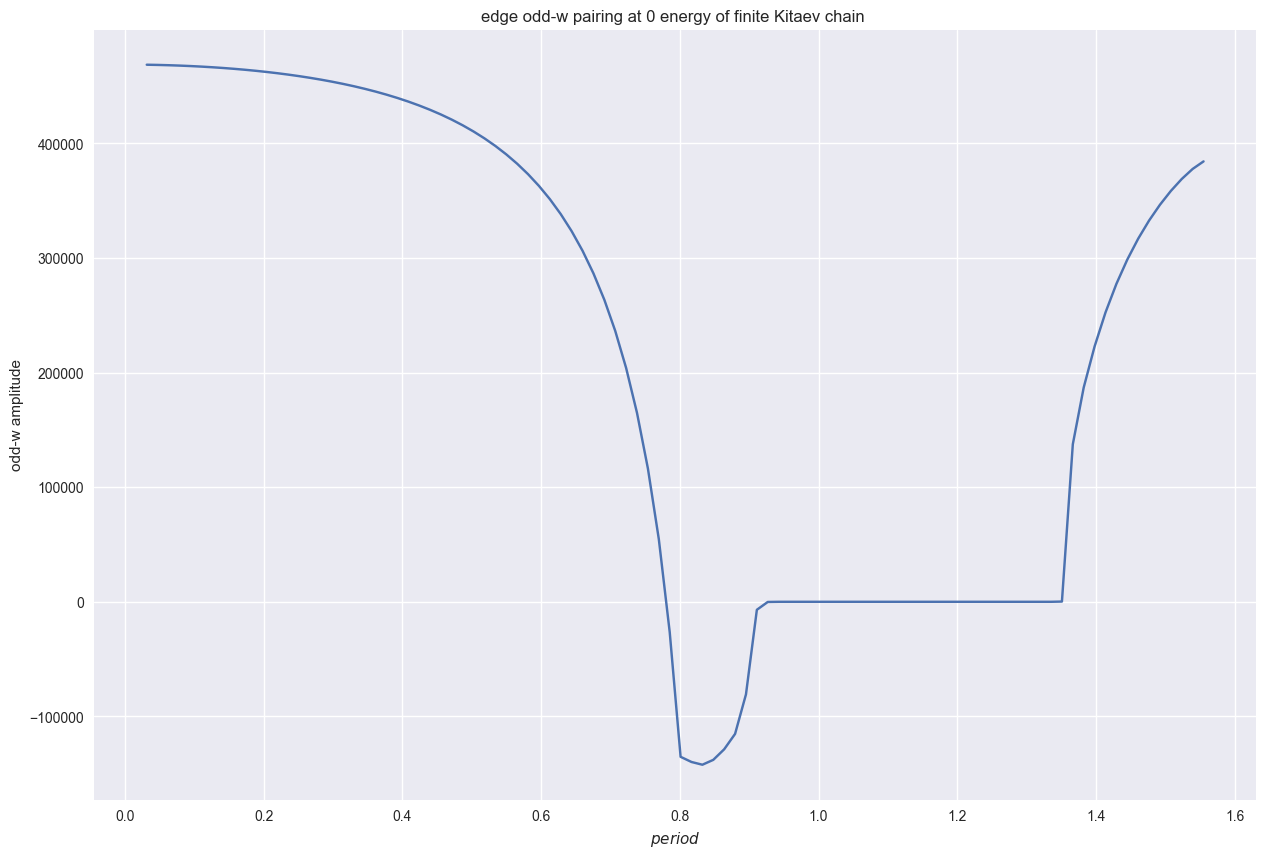

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


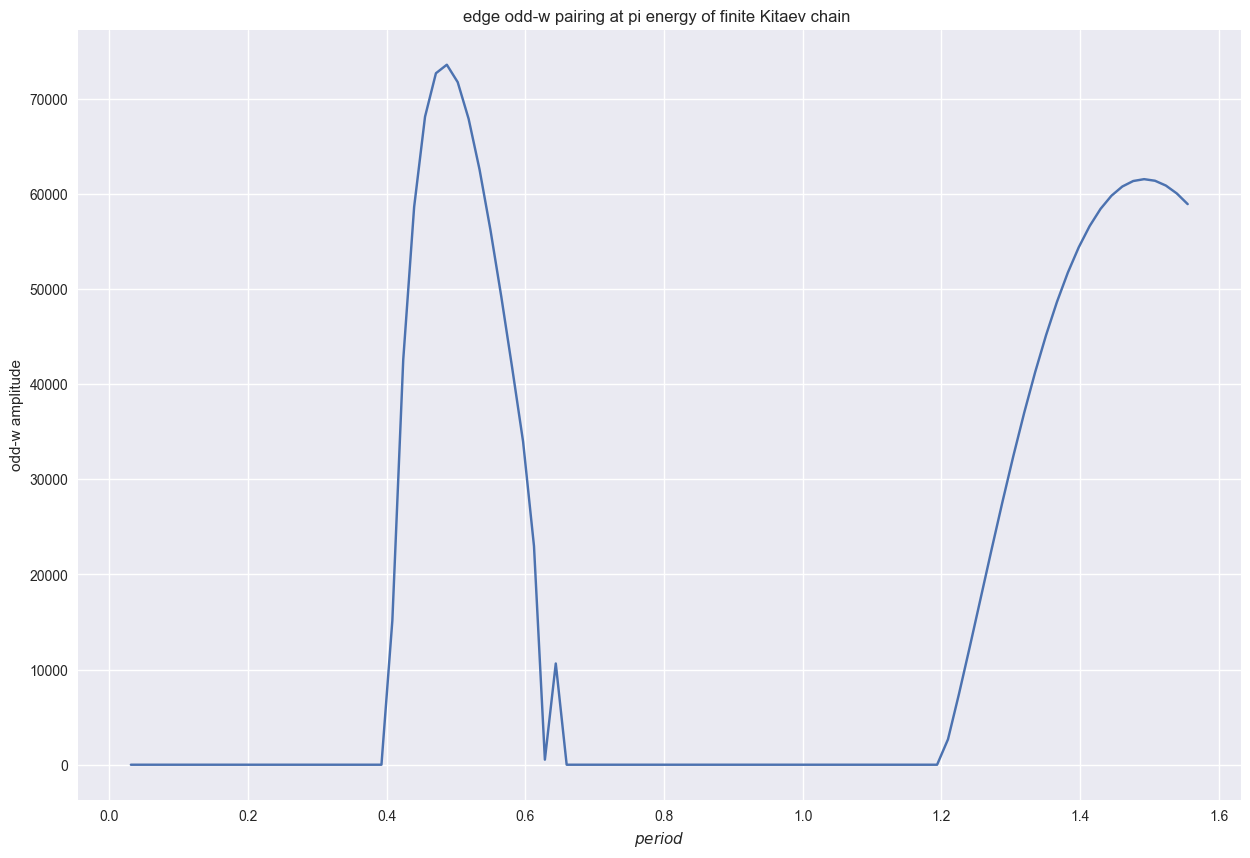

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


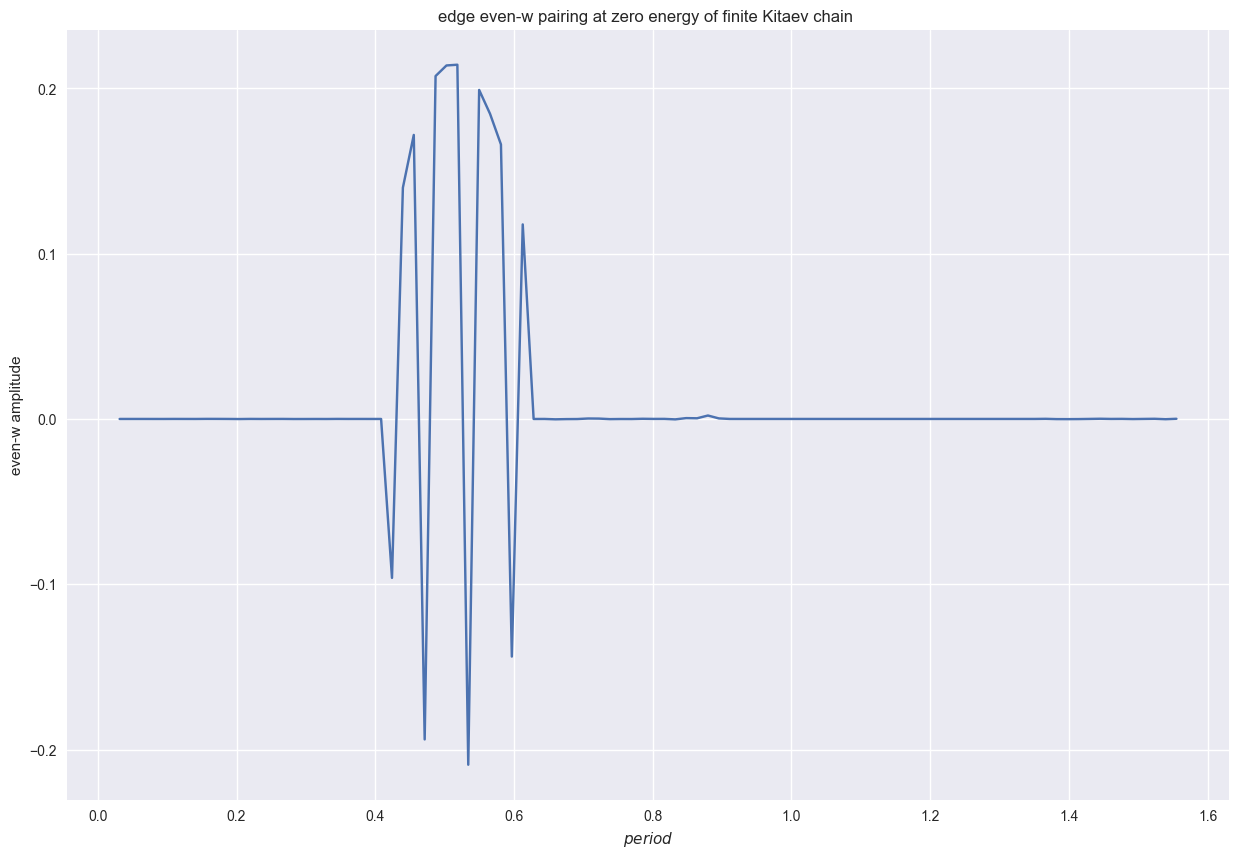

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


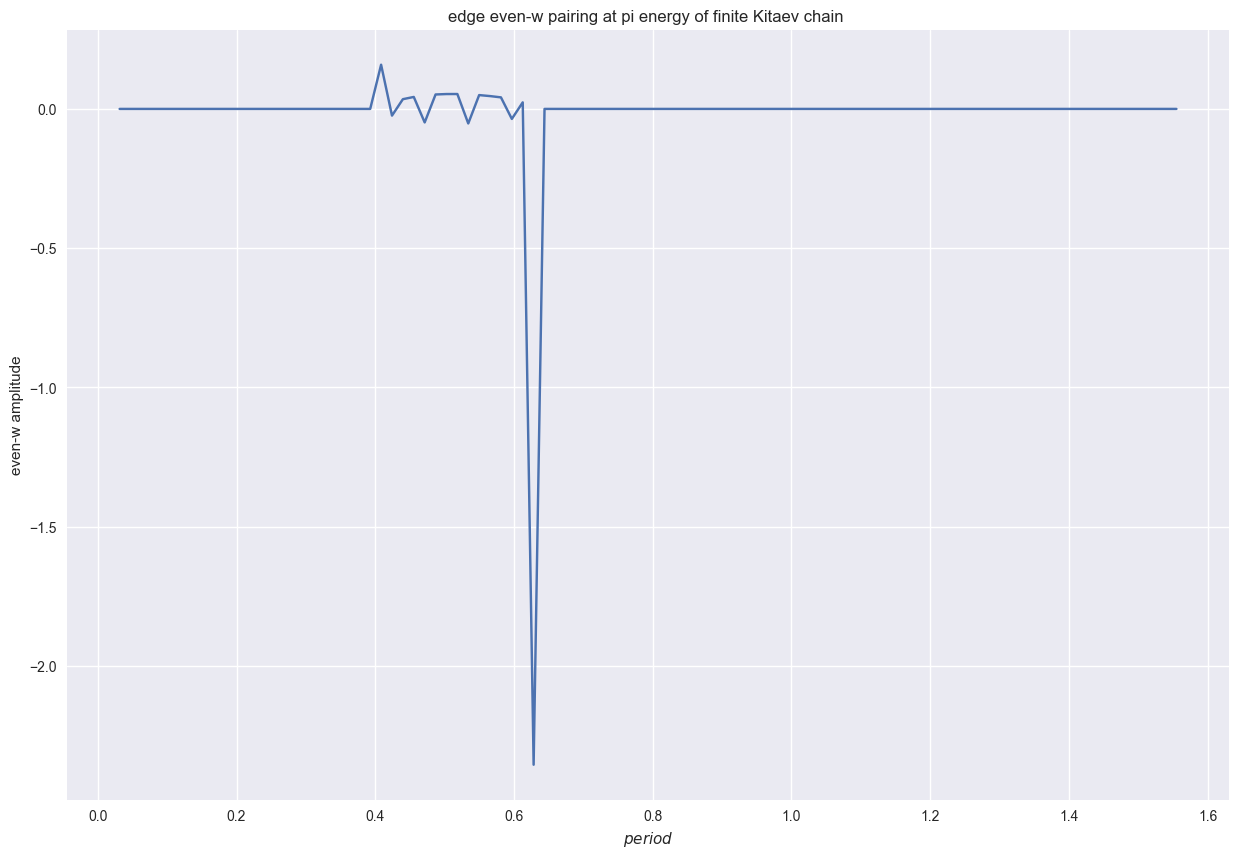

In [2]:
f_0_odd = [(G_0_odd[i][0, 1].imag) for i in range(len(G_0_odd))]
f_0_even = [(G_0_even[i][0, 1].imag) for i in range(len(G_0_even))]
f_pi_odd = [(G_pi_odd[i][0, 1].imag) for i in range(len(G_pi_odd))]
f_pi_even = [(G_pi_even[i][0, 1].imag) for i in range(len(G_pi_even))]
print(len(G_0_odd))

plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T, f_0_odd)
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_odd)
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T, f_0_even)
plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_even)
plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [3]:
f_0_odd_bulk = [[G_0_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_0_even_bulk =  [[G_0_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_odd_bulk =  [[G_pi_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_even_bulk =  [[G_pi_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


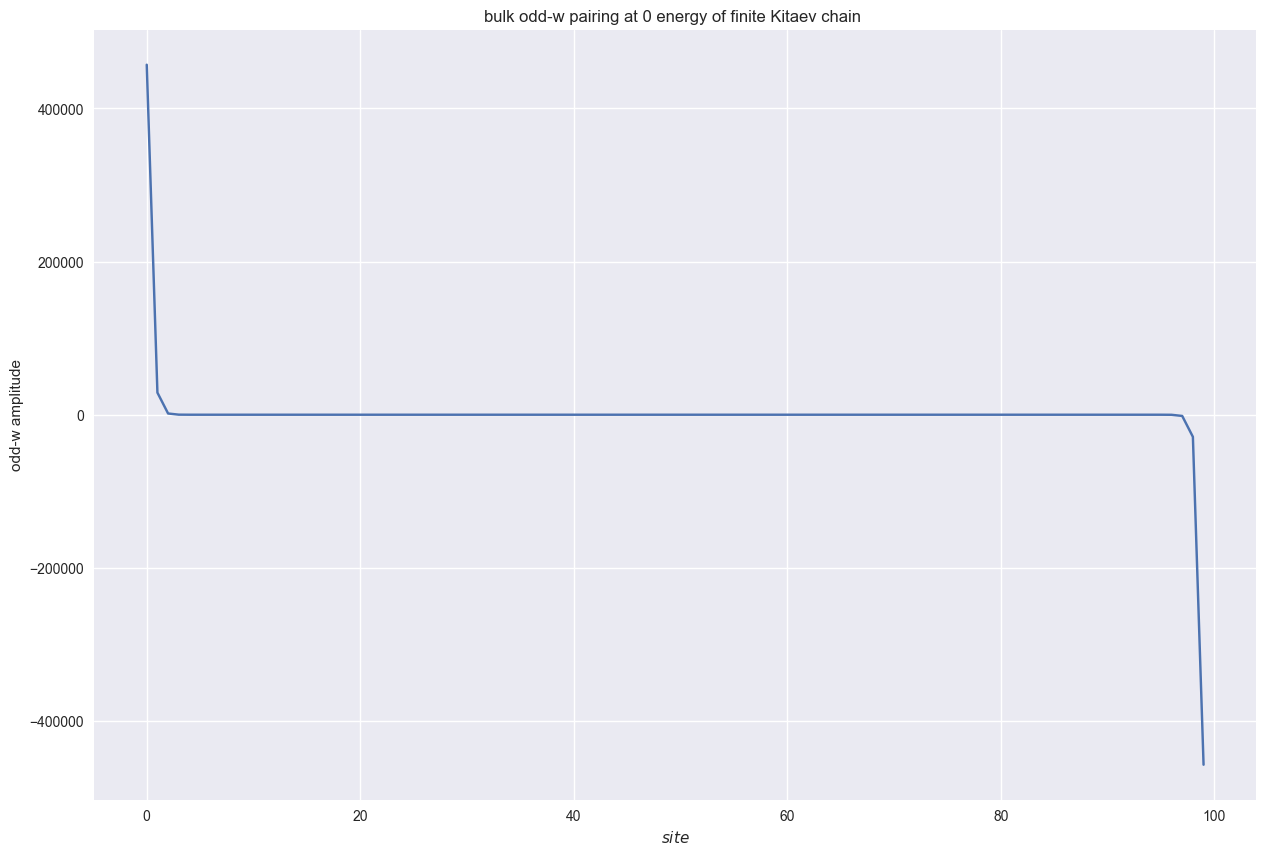

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


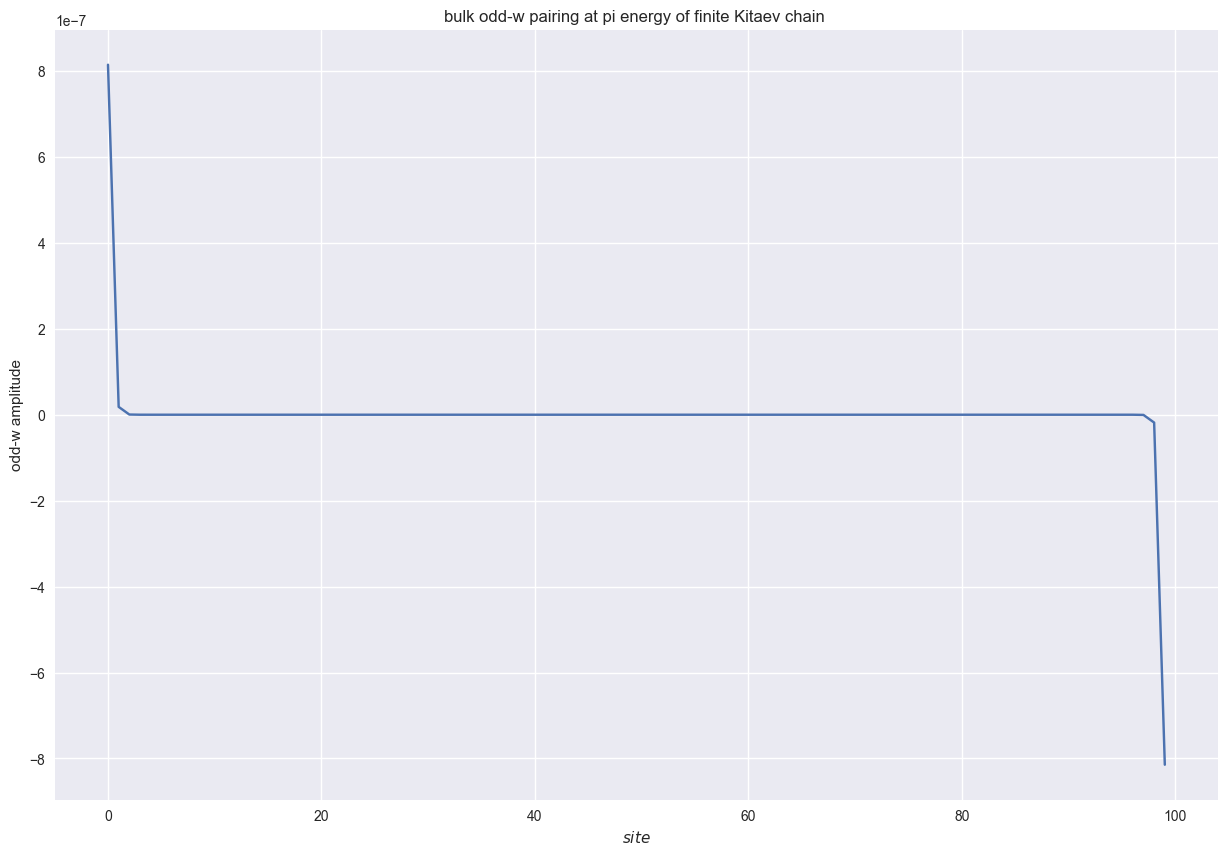

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


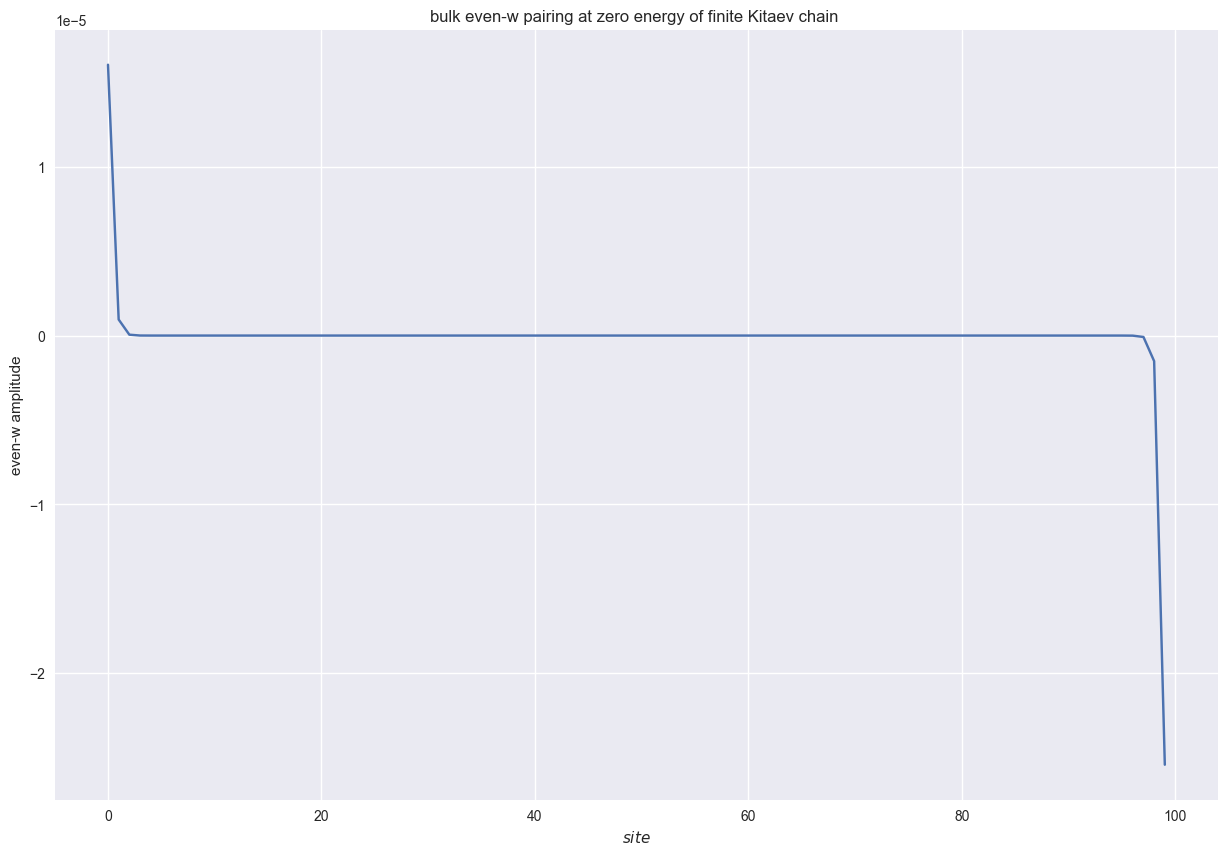

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


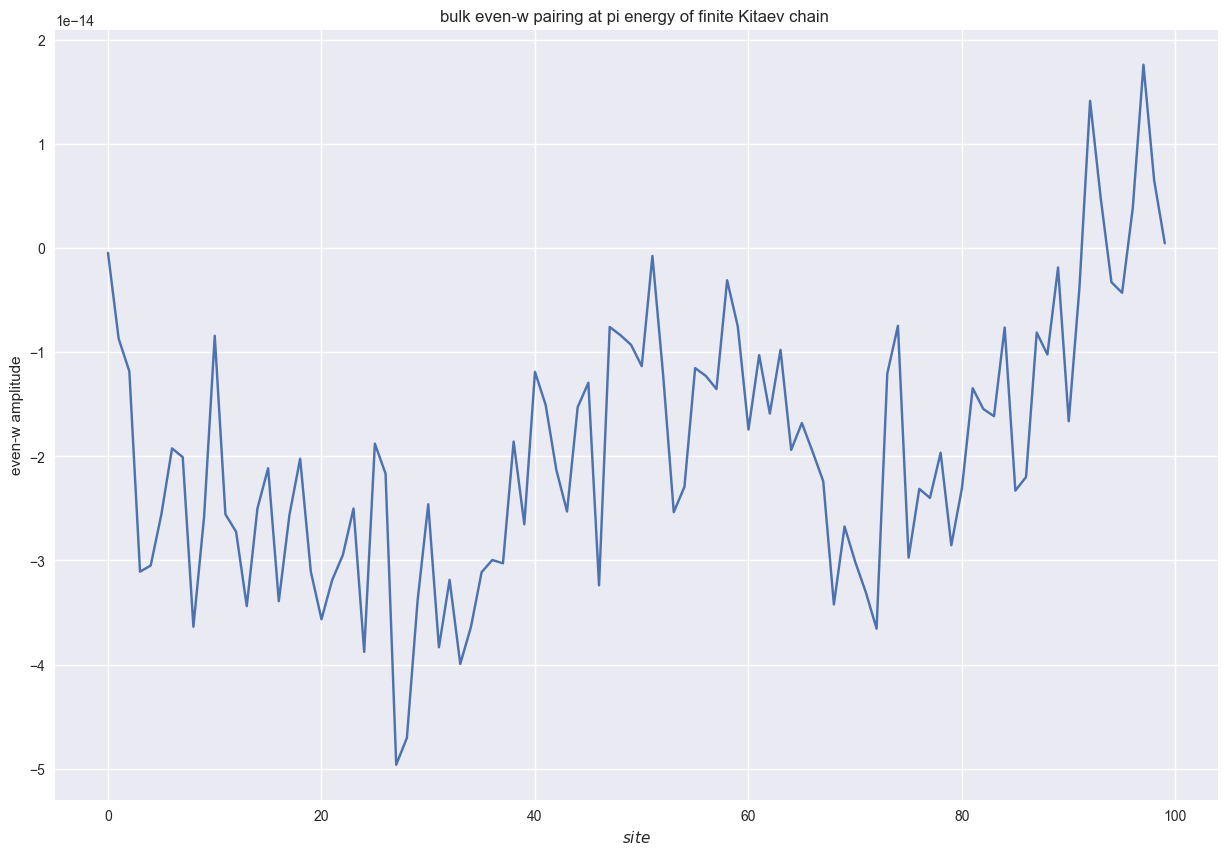

In [4]:
good_number = 15
gg = good_number
plt.title("bulk odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

In [5]:
f_0_odd_bulk = [[G_0_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_0_even_bulk =  [[G_0_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_odd_bulk =  [[G_pi_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_even_bulk =  [[G_pi_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


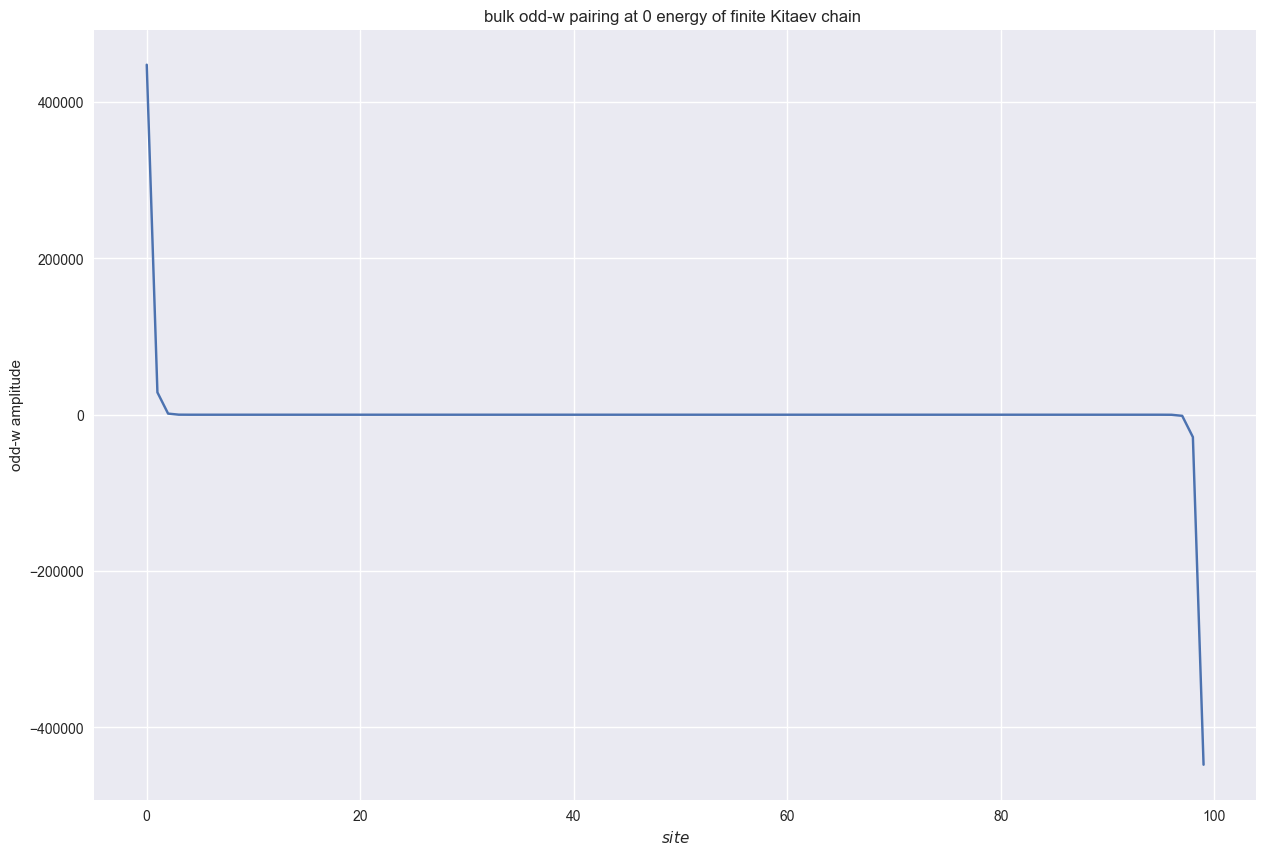

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


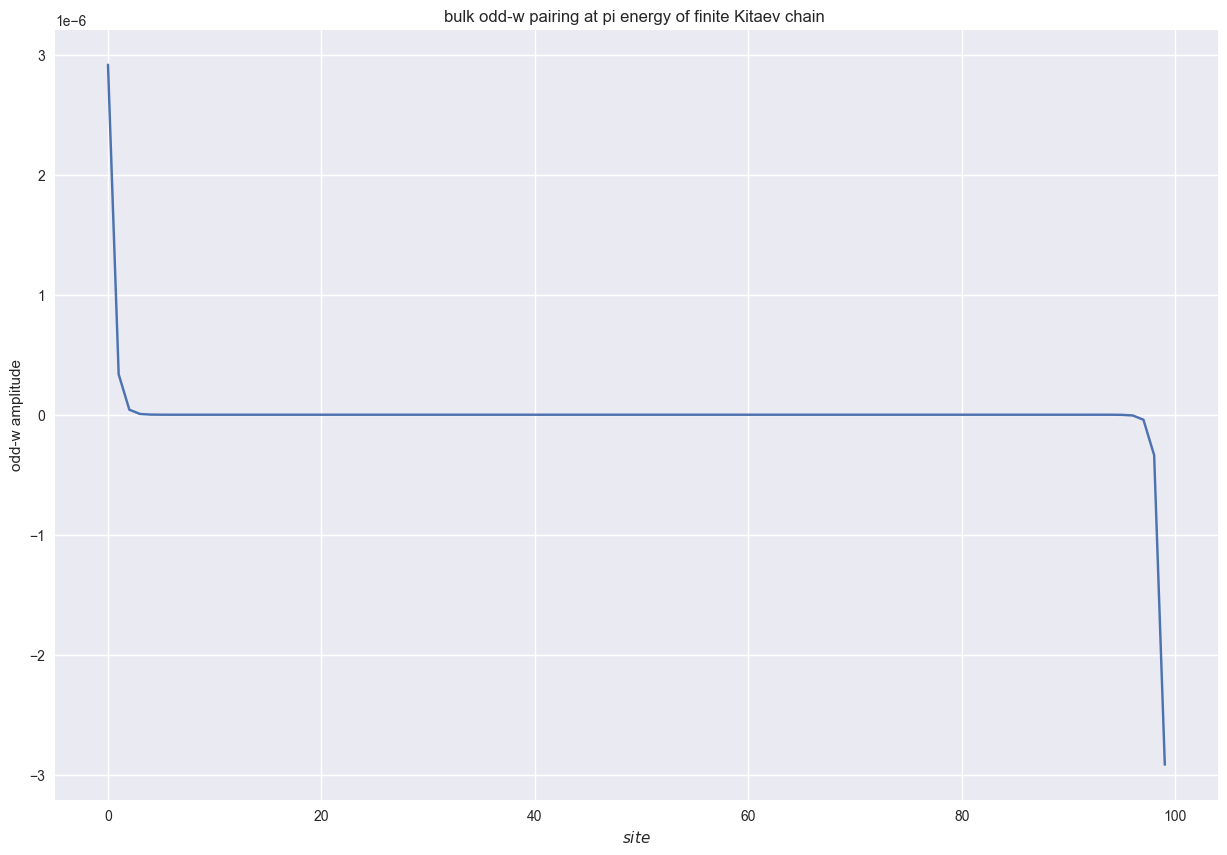

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


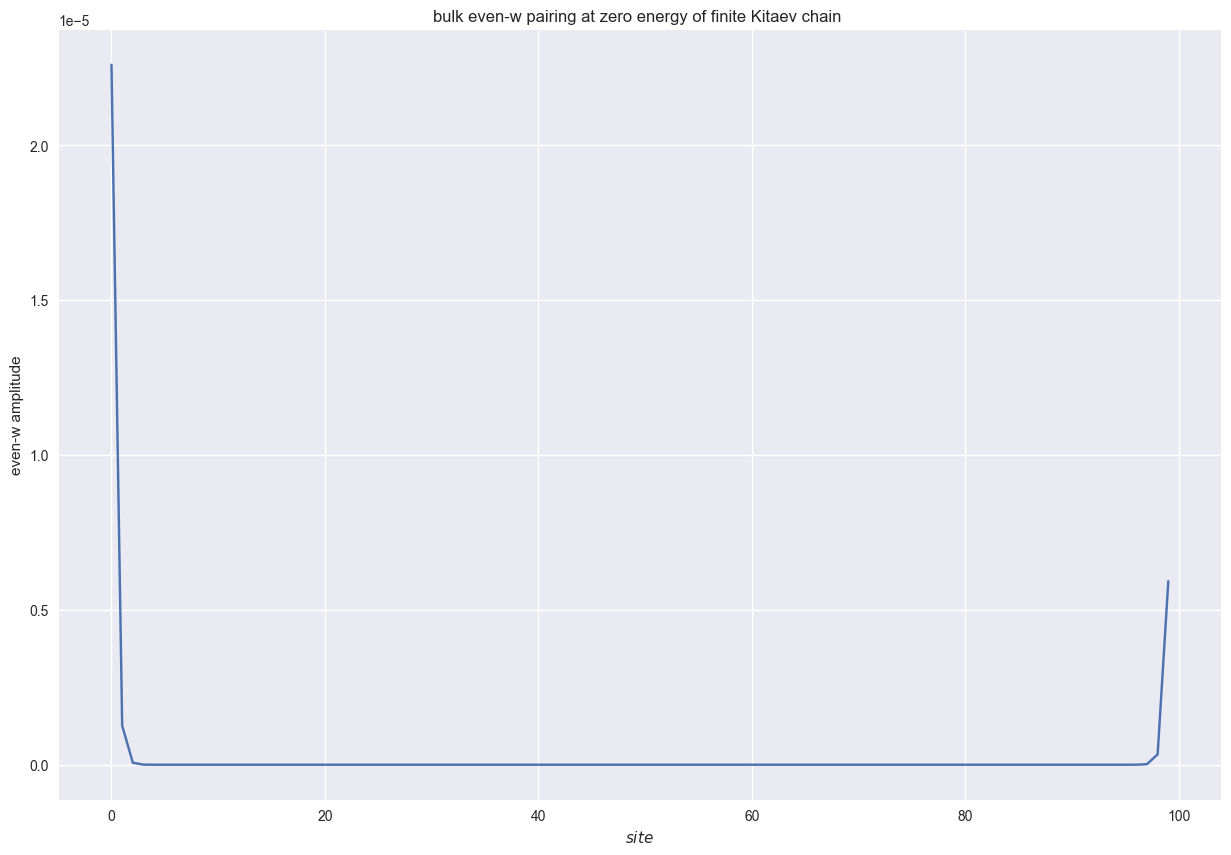

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


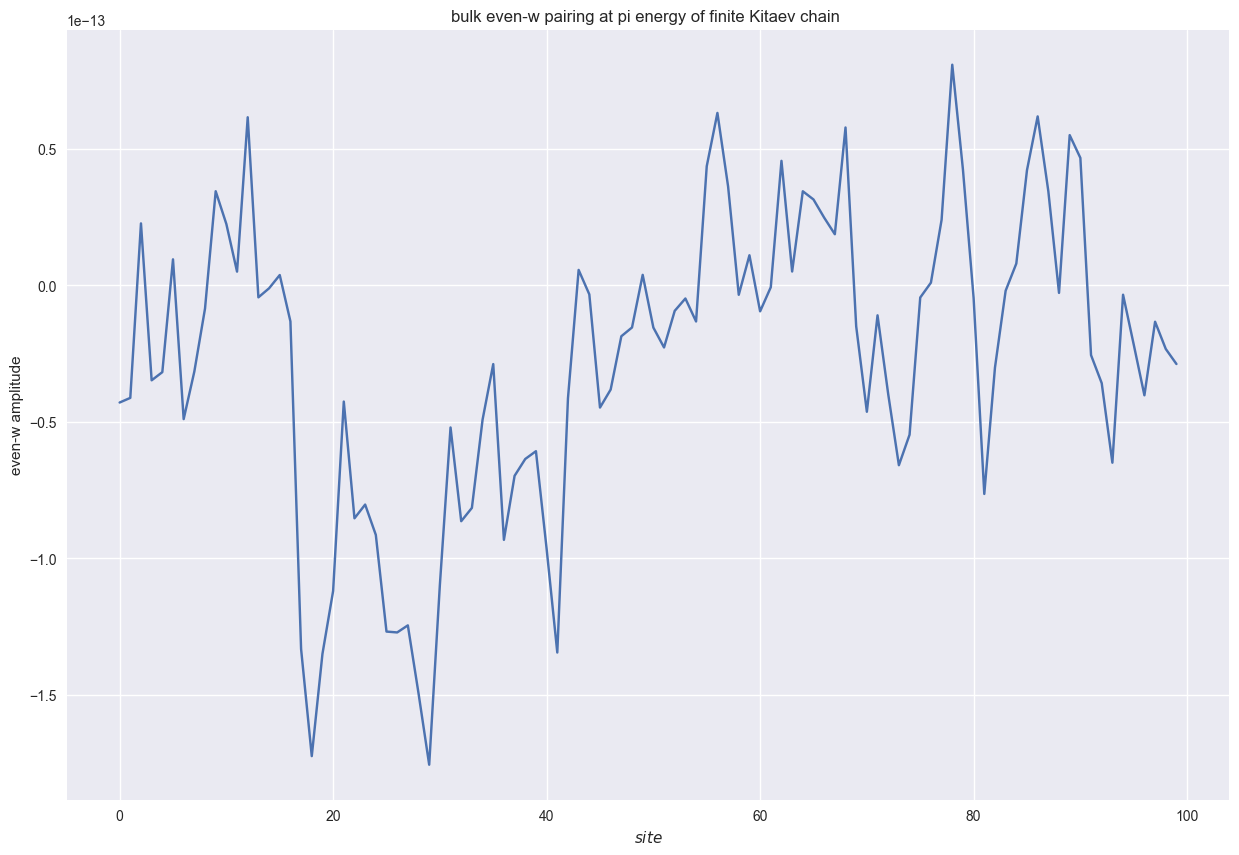

In [6]:
good_number = 20
gg = good_number
plt.title("bulk odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

In [7]:

#N_global = 100
#d_global = 2
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=0 * t), v=offsite(_delta=1 * t, _t=t))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=1 * t), v=offsite(_delta=1 * t, _t=t))
# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?
var_k = np.arange(-3, 3, 0.01)
G_0_odd_bulk = []
G_0_even_bulk = []
G_pi_odd_bulk = []
G_pi_even_bulk = []

delta_amount =  0.00001
delta_positive_0 = (delta_amount * 1j) * np.eye(  d_global)
delta_negative_0 = (-delta_amount * 1j) * np.eye( d_global)
delta_positive_pi = (1 + delta_amount * 1j) * np.eye( d_global)
delta_negative_pi = (-1 - delta_amount * 1j) * np.eye( d_global)

for k in tqdm(var_k):
    h_f = floquet_hamiltonian([h_1.k_space_hamiltonian(k), h_2.k_space_hamiltonian(k)], T=0.5)
    G_0_pos = np.array(la.inv(delta_positive_0 - h_f))
    G_0_neg = np.array(la.inv(delta_negative_0 - h_f))

    G_0_odd_bulk.append((G_0_pos - G_0_neg) / 2)
    G_0_even_bulk.append((G_0_pos + G_0_neg) / 2)

    G_pi_pos = np.array(la.inv(delta_positive_pi - h_f))
    G_pi_neg = np.array(la.inv(delta_negative_pi - h_f))
    G_pi_odd_bulk.append((G_pi_pos - G_pi_neg) / 2)
    G_pi_even_bulk.append((G_pi_pos + G_pi_neg) / 2)
    pass


100%|██████████| 600/600 [00:00<00:00, 2359.36it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


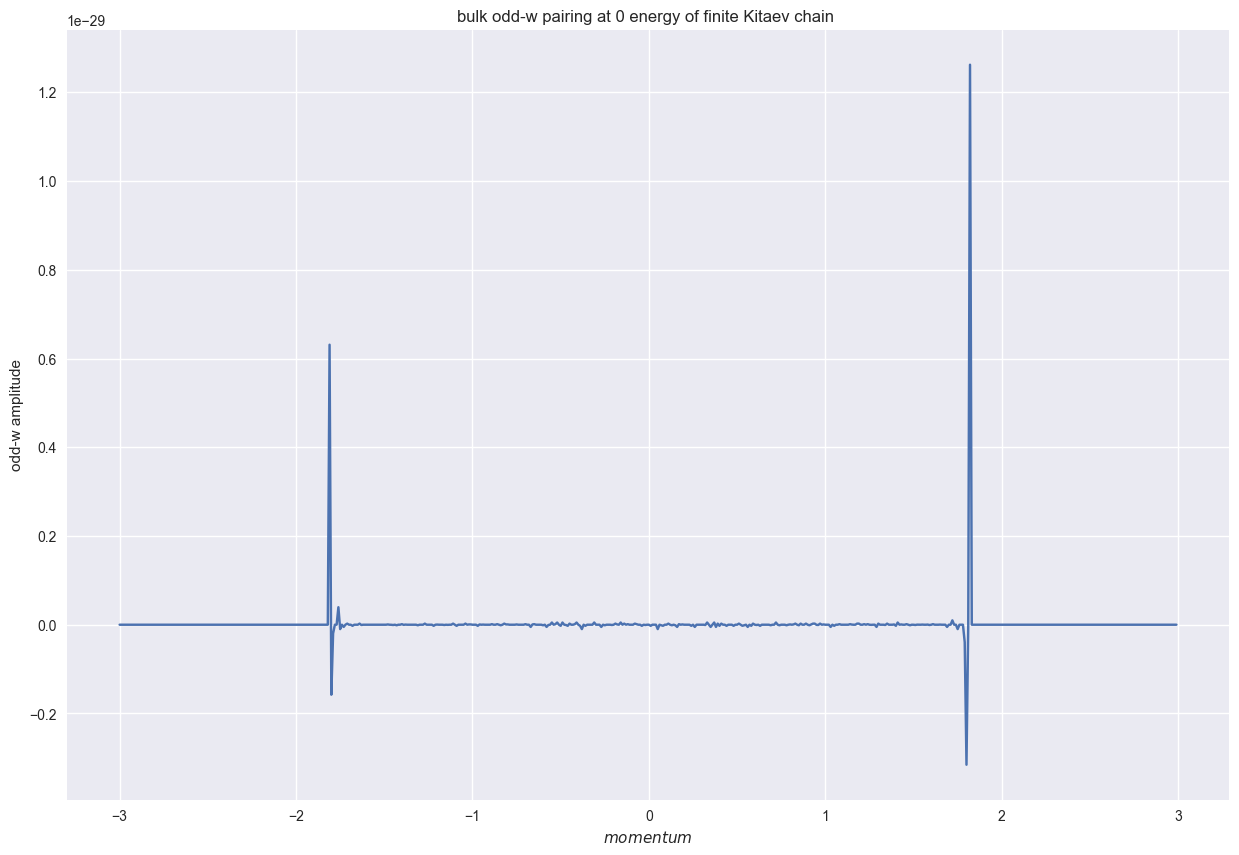

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


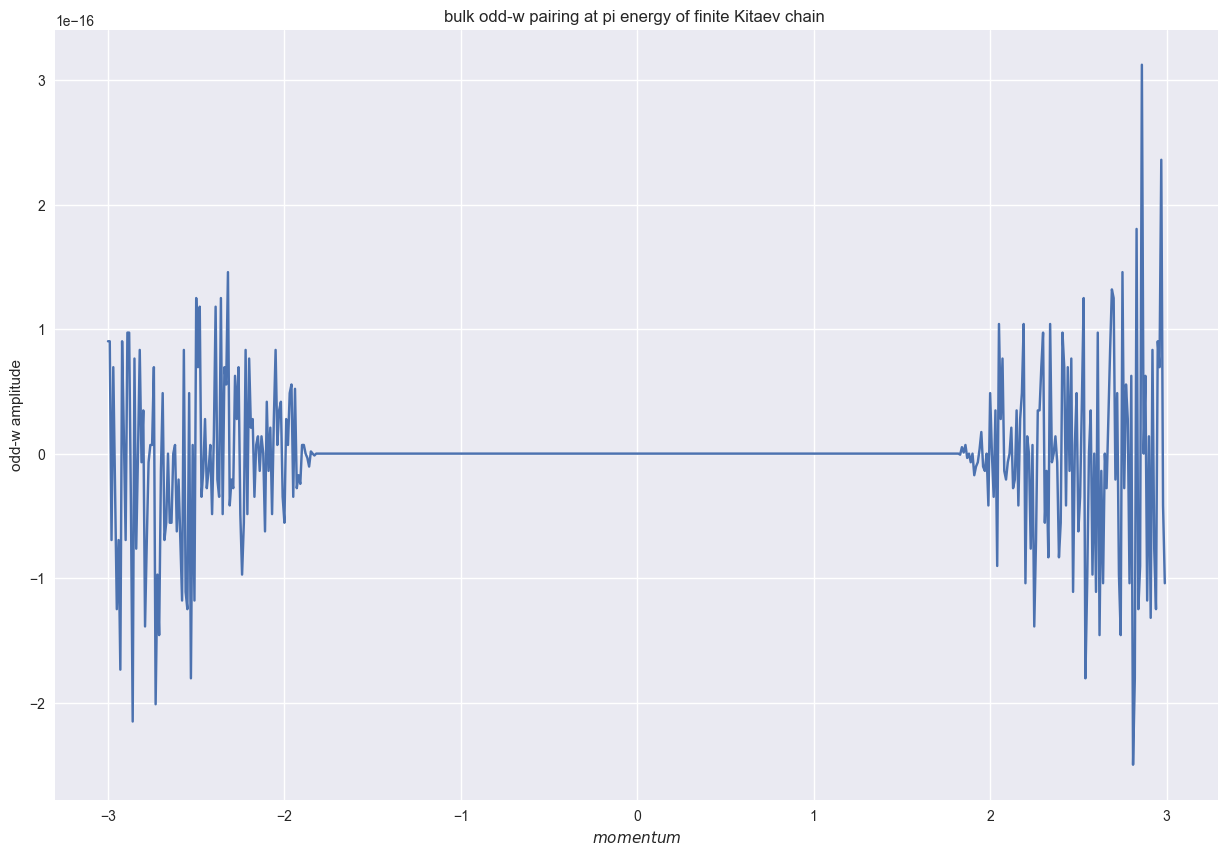

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


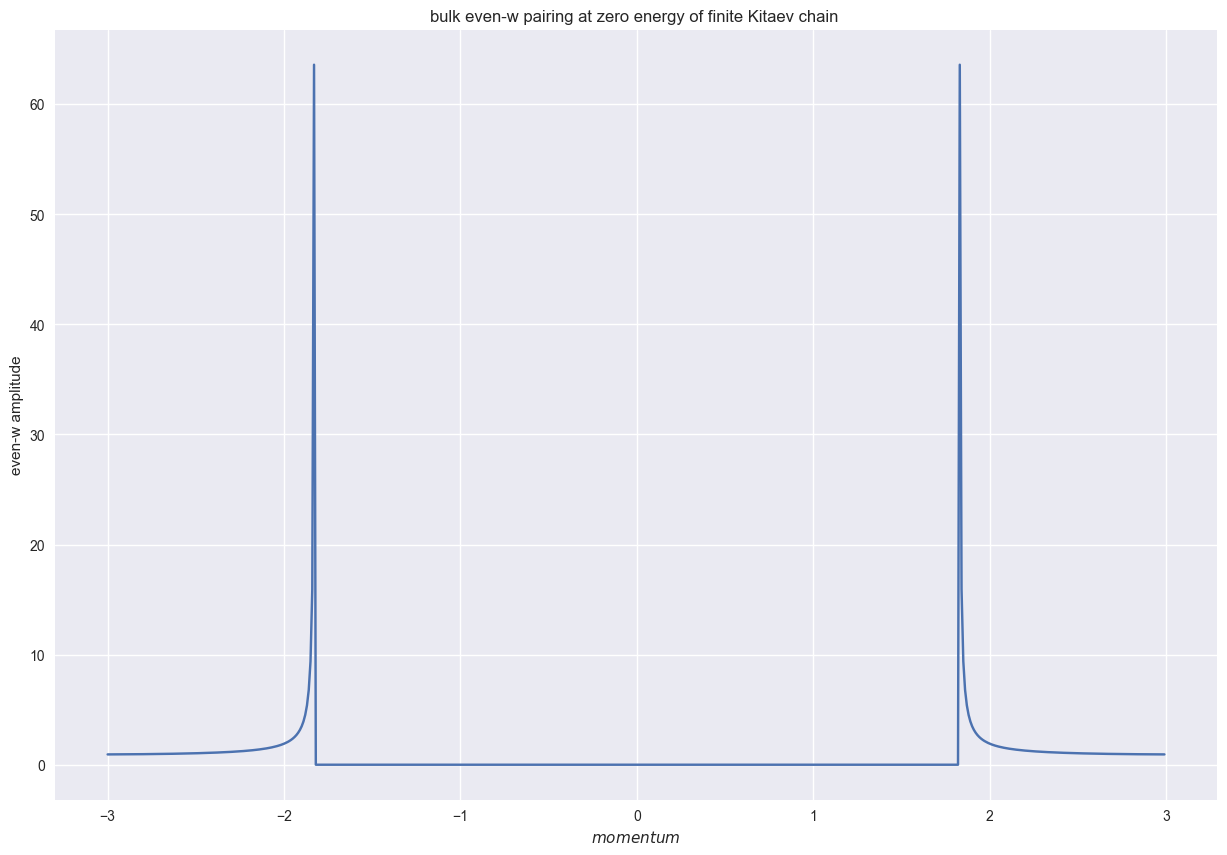

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


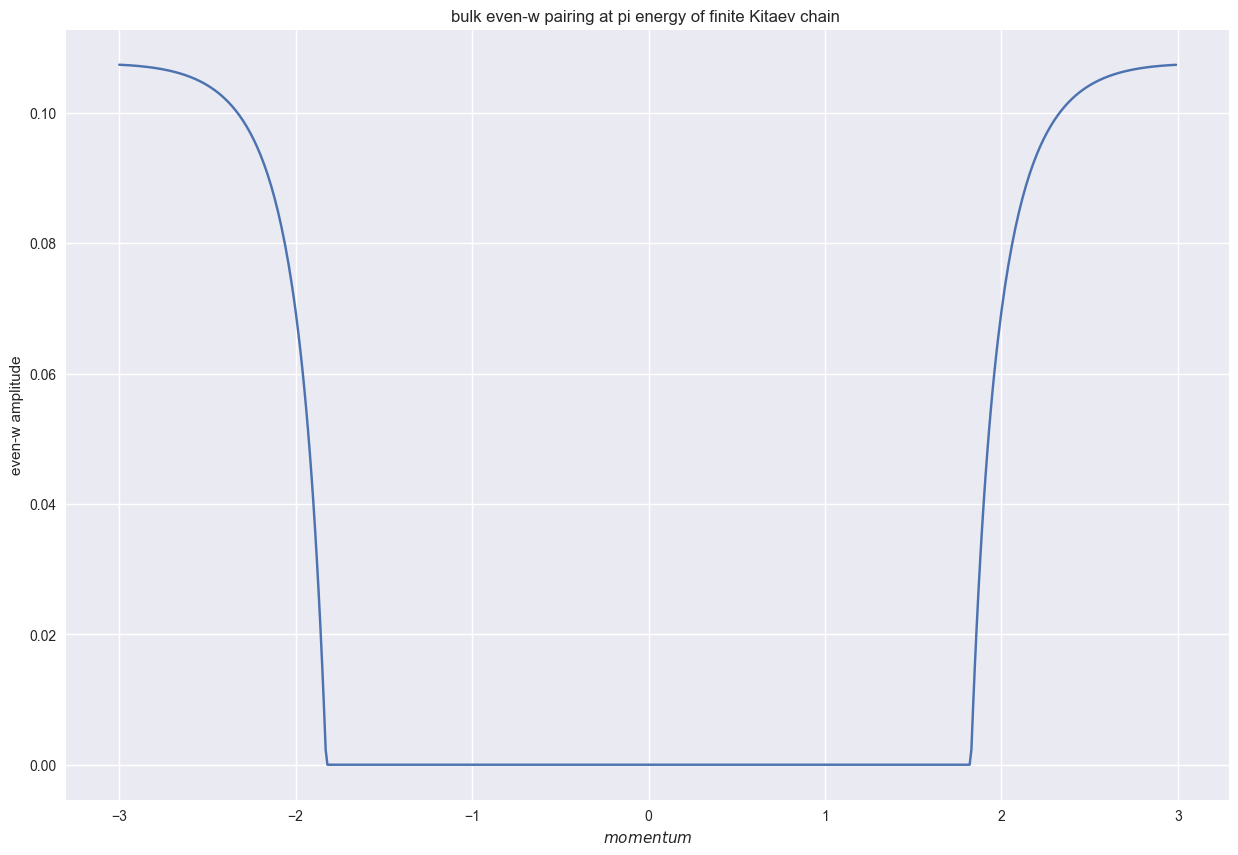

In [8]:
f_0_odd_k = [(G_0_odd_bulk[i][0, 1].imag) for i in range(len(G_0_odd_bulk))]
f_0_even_k = [(G_0_even_bulk[i][0, 1].imag) for i in range(len(G_0_even_bulk))]
f_pi_odd_k = [(G_pi_odd_bulk[i][0, 1].imag) for i in range(len(G_pi_odd_bulk))]
f_pi_even_k = [(G_pi_even_bulk[i][0, 1].imag) for i in range(len(G_pi_even_bulk))]


good_number = 20
gg = good_number
plt.title("bulk odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_k, f_0_odd_k)
plt.ylabel('odd-w amplitude')
plt.xlabel('$momentum$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_k, f_pi_odd_k)
plt.ylabel('odd-w amplitude')
plt.xlabel('$momentum$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_k, f_0_even_k)
plt.ylabel('even-w amplitude')
plt.xlabel('$momentum$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_k, f_pi_even_k)
plt.ylabel('even-w amplitude')
plt.xlabel('$momentum$')
#plt.yscale('log')
plt.legend()
plt.show()

In [9]:
N_global=2
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=0 * t), v=offsite(_delta=1 * t, _t=t))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=1 * t), v=offsite(_delta=1 * t, _t=t))
h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=0.5)

for n in range(N_global):
    print(np.isclose(h_f[d_global*n:(n+1)*d_global,d_global*n:(n+1)*d_global],h_f[d_global*(1+n):(n+2)*d_global,d_global*(n+1):(n+2)*d_global]))
    print("\n")

[[ True  True]
 [ True  True]]




ValueError: operands could not be broadcast together with shapes (2,2) (0,0) 

In [ ]:
print(h_f)